In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/datasets/rest_data_us_upd.csv")

df.head()


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [36]:
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None

                 id       number
count   9651.000000  9651.000000
mean   16611.000000    43.695161
std     2786.148058    47.622874
min    11786.000000     1.000000
25%    14198.500000    14.000000
50%    16611.000000    27.000000
75%    19023.500000    46.000000
max    21436.000000   229.000000



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa separar importação da leitura do csv em células diferentes
</div>

In [37]:
df = df.drop_duplicates()
df['chain'].fillna(df['chain'].mean(), inplace=True)

print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

print(df.isnull().sum())


Número de linhas duplicadas: 0
id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


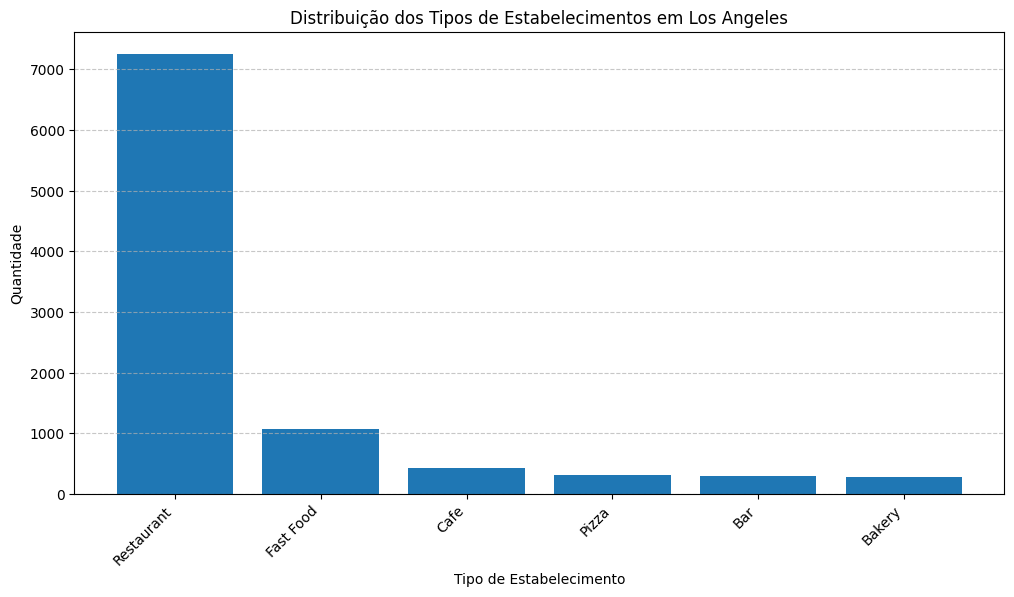

In [38]:
# Proporções de vários tipos de estabelecimentos

object_type_counts = df['object_type'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(object_type_counts.index, object_type_counts.values)
plt.xlabel("Tipo de Estabelecimento")
plt.ylabel("Quantidade")
plt.title("Distribuição dos Tipos de Estabelecimentos em Los Angeles")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


<s>
<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Convém concentrar as importações na 1a célula do notebook </div>

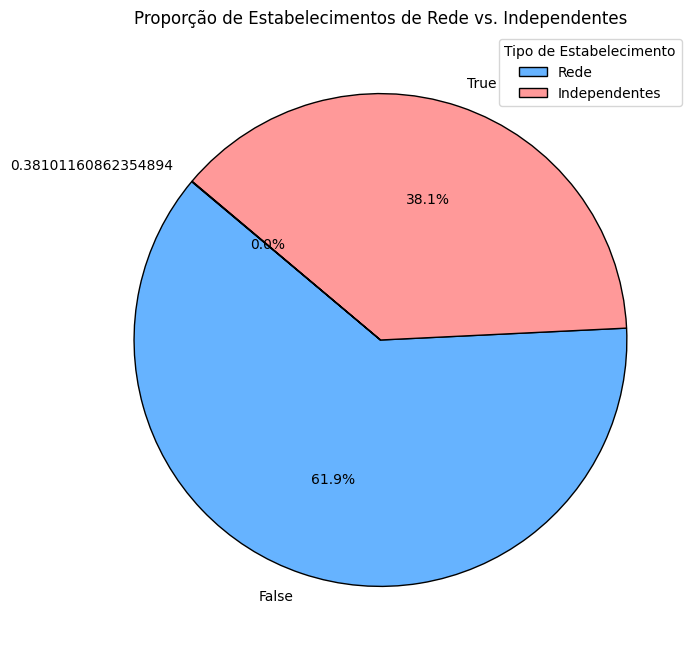

In [39]:
# Proporções de estabelecimentos de rede e não

chain_counts = df['chain'].value_counts()

colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8,8))
plt.pie(chain_counts, labels=chain_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.legend(["Rede", "Independentes"], title="Tipo de Estabelecimento", loc="best")

plt.title("Proporção de Estabelecimentos de Rede vs. Independentes")

plt.show()

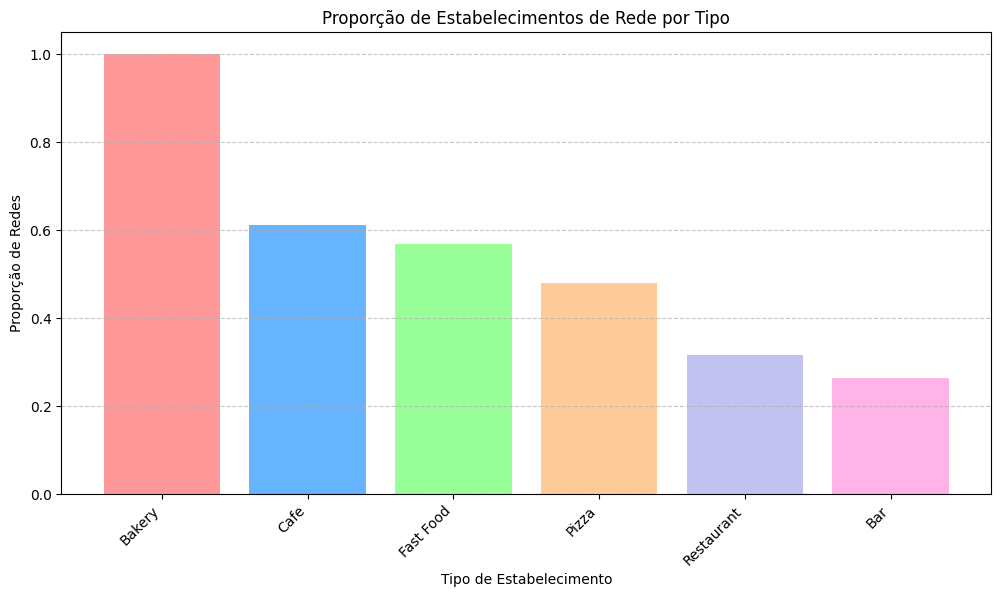

In [40]:
# Proporção de estabelecimentos de rede por tipo

df['chain'] = df['chain'].astype(str) 
df['chain'] = df['chain'].map({'True': 1, 'False': 0, 'Yes': 1, 'No': 0})

df['chain'] = pd.to_numeric(df['chain'], errors='coerce')

chain_ratio = df.groupby("object_type")["chain"].mean().sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(chain_ratio.index, chain_ratio.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.xlabel("Tipo de Estabelecimento")
plt.ylabel("Proporção de Redes")
plt.title("Proporção de Estabelecimentos de Rede por Tipo")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


chain
0.0    46.171467
1.0    39.694233
Name: number, dtype: float64


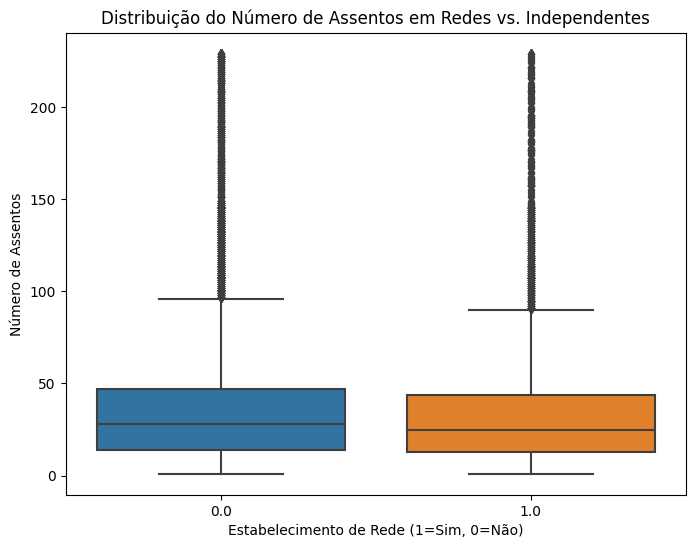

In [30]:
# Média de assentos entre redes e independentes
seat_comparison = df.groupby("chain")["number"].mean()

print(seat_comparison)

plt.figure(figsize=(8,6))
sns.boxplot(x=df["chain"], y=df["number"])
plt.xlabel("Estabelecimento de Rede (1=Sim, 0=Não)")
plt.ylabel("Número de Assentos")
plt.title("Distribuição do Número de Assentos em Redes vs. Independentes")

plt.show()


Como o número de assentos não varia muito entre redes e independentes, as redes provavelmente se diferenciam mais pela padronização e experiência.

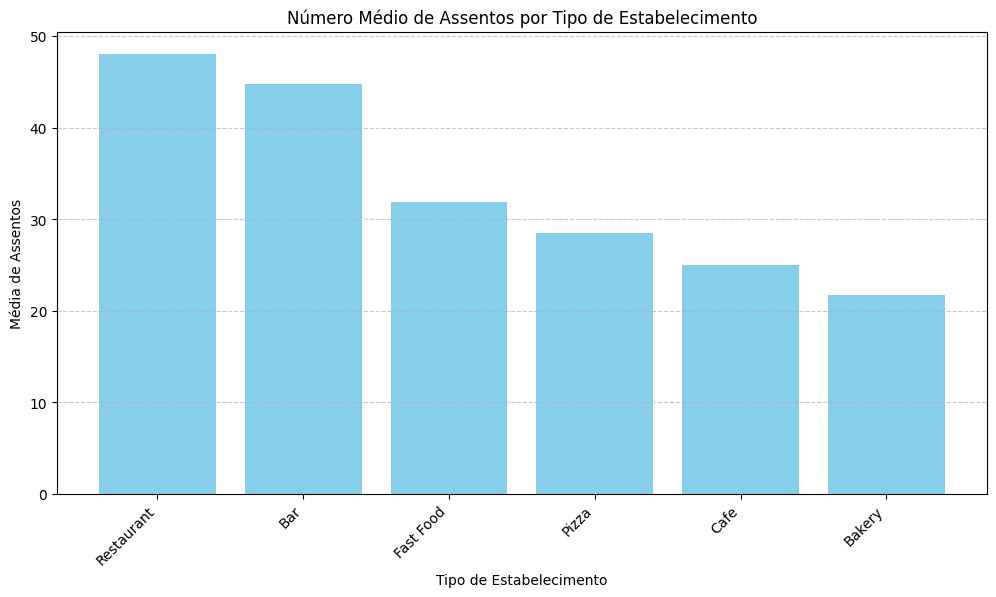

object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64


In [31]:
# Média de assentos por tipo de estabelecimento

seat_avg_by_type = df.groupby("object_type")["number"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(seat_avg_by_type.index, seat_avg_by_type.values, color='skyblue')
plt.xlabel("Tipo de Estabelecimento")
plt.ylabel("Média de Assentos")
plt.title("Número Médio de Assentos por Tipo de Estabelecimento")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

print(seat_avg_by_type)


In [32]:
import re

def clean_street_name(address):
    if pd.isna(address):
        return None
    parts = address.split(",")[0]
    street_name = re.sub(r'^\d+\s', '', parts) 
    return street_name

df["street_name"] = df["address"].apply(clean_street_name)

print(df[["address", "street_name"]].head())



                   address         street_name
0   3708 N EAGLE ROCK BLVD   N EAGLE ROCK BLVD
1        100 WORLD WAY 120       WORLD WAY 120
2  6801 HOLLYWOOD BLVD 253  HOLLYWOOD BLVD 253
3       1814 W SUNSET BLVD       W SUNSET BLVD
4       2100 ECHO PARK AVE       ECHO PARK AVE


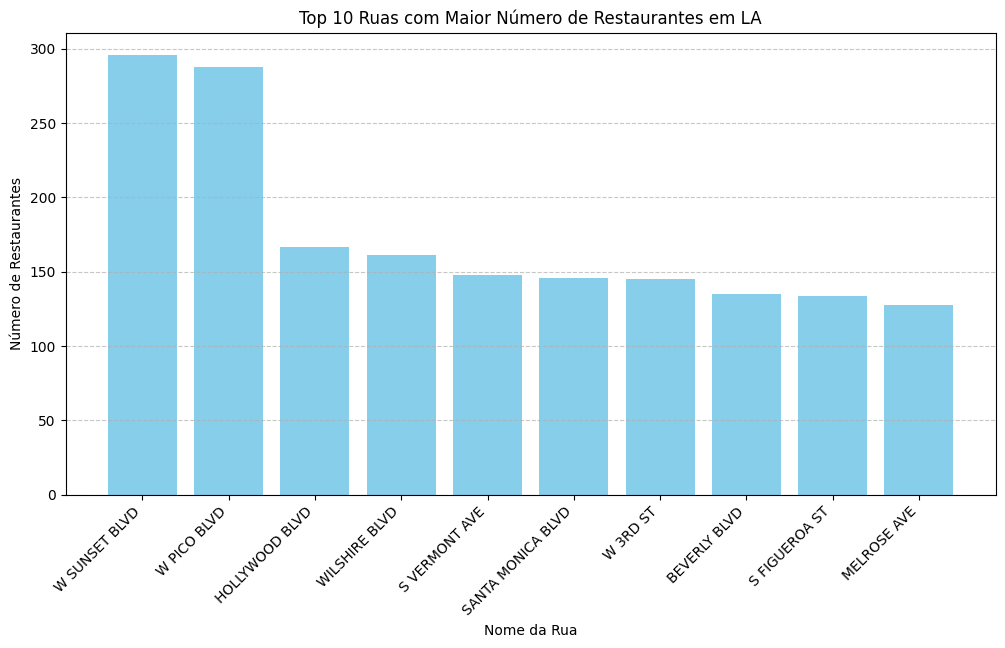

In [33]:
# Número de restaurantes por rua

top_streets = df["street_name"].value_counts().head(10)

plt.figure(figsize=(12,6))
plt.bar(top_streets.index, top_streets.values, color='skyblue')
plt.xlabel("Nome da Rua")
plt.ylabel("Número de Restaurantes")
plt.title("Top 10 Ruas com Maior Número de Restaurantes em LA")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [34]:
# Número de ruas com apenas um restaurante

street_counts = df["street_name"].value_counts()

single_restaurant_streets = (street_counts == 1).sum()

print(f"Número de ruas com apenas um restaurante: {single_restaurant_streets}")

Número de ruas com apenas um restaurante: 2450


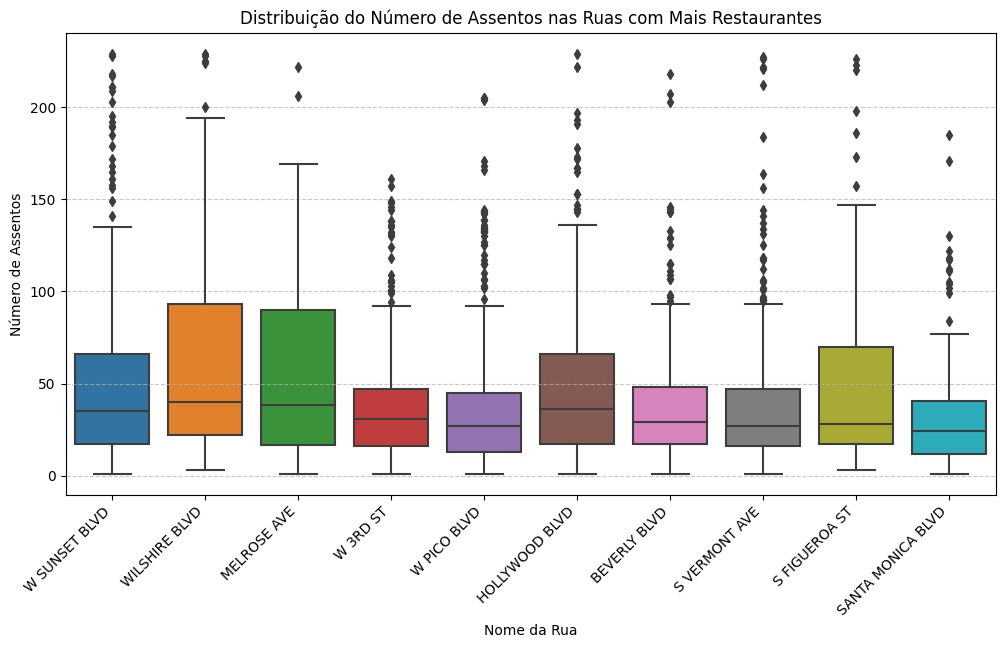

In [22]:

top_streets = df["street_name"].value_counts().head(10).index

top_streets_df = df[df["street_name"].isin(top_streets)]

plt.figure(figsize=(12,6))
sns.boxplot(x=top_streets_df["street_name"], y=top_streets_df["number"])
plt.xlabel("Nome da Rua")
plt.ylabel("Número de Assentos")
plt.title("Distribuição do Número de Assentos nas Ruas com Mais Restaurantes")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Percebe-se que a linha dentro da caixa tem pouca variação, entre 20 e 80 assentos mais ou menos. Onde tem uma variação maior, possivelmente é uma rua onde tem mais restaurantes.

As outras ruas possuem um padrão mais uniforme de assentos, o que pode indicar um tipo específico de restaurante predominante.

A presença de outliers sugere que há alguns restaurantes muito grandes em todas as regiões analisadas.

Presentation <https://drive.google.com/file/d/1e22whLJTzYAsy7Z_UVwLGo6yM-Nv9N3e/view?usp=sharing>